# Statistical Power Assignment

In [2]:
import numpy as np
from numpy import array
import pandas as pd
import math

from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [3]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=0.5, nobs1=None, alpha=0.05, power=0.8, ratio=1.0)
2 * math.ceil(result)

128

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [4]:
effect_result = analysis.solve_power(effect_size=None, nobs1=50, alpha=0.05, power=0.8, ratio=1.0)
effect_result

0.5658803032224228

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

In [69]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=None, nobs1=100, alpha=0.05, power=0.80, ratio=1.0)
result

0.39813911739112756

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [5]:
effect = 0.4
alpha =0.05

analysis = TTestIndPower()
result = analysis.solve_power(effect, power=None, nobs1=100, ratio=1.0, alpha=alpha)
print('Power: %.3g' % result)

Power: 0.804


Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

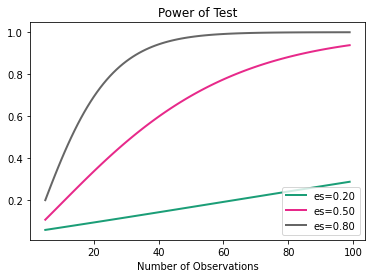

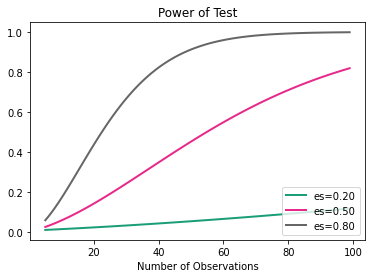

In [6]:
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))

analysis = TTestIndPower()
alpha_1 = analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha= .05)
alpha_2 = analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha= .01)
plt.show(alpha_1)
plt.show(alpha_2)

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [28]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'

titanic = pd.read_csv(data_url)
titanic_filtered = titanic.dropna(subset=['Age'])

titanic_S = titanic_filtered[(titanic_filtered['Survived'] == 1)]
titanic_NS = titanic_filtered[(titanic_filtered['Survived'] == 0)]


### Summarize the number of observations and average age per group.

In [43]:
n_obs1 = len(titanic_S['Age'])
print(n_obs1)
n_obs2 = len(titanic_NS['Age'])
print(n_obs2)
total_n_obs = n_obs1 + n_obs2
print(total_n_obs)

mean_age_S = titanic_S['Age'].mean()
print(mean_age_S)
mean_age_NS = titanic_NS['Age'].mean()
print(mean_age_NS)

290
424
714
28.343689655172415
30.62617924528302


### Perform t-test.

In [30]:
stats.ttest_ind(titanic_S['Age'], titanic_NS['Age']) 

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [35]:
var1 = titanic_S['Age'].var()
var2 = titanic_NS['Age'].var()

pooled_stdev = np.sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))

effect_size = (mean_age_S - mean_age_NS) / pooled_stdev

print(effect_size)


-0.15748597191363298


**Use the effect size you calculated to compute the statistical power of this test.**

In [60]:
alpha = 0.05
nobs1 = total_n_obs 
ratio = n_obs1/n_obs2

analysis = TTestIndPower()
result = analysis.solve_power(effect_size, power=None, nobs1=nobs1, ratio=ratio, alpha=alpha)
print('Power: %.3g' % result)
#print(result)#

Power: 0.764


**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [61]:
alpha = 0.05
nobs1 = total_n_obs 
ratio = n_obs1/n_obs2

analysis = TTestIndPower()
result = analysis.solve_power(effect_size=None, power=0.80, nobs1=total_n_obs, ratio=ratio, alpha=alpha)
print('Effect size: %.3g' % result)

Effect size: 0.165


**Determine the sample size necessary to get a statistical power of 0.8.**

In [66]:
alpha = 0.05
ratio = n_obs1/n_obs2

analysis = TTestIndPower()
nobs_result = analysis.solve_power(effect_size=effect_size, power=0.80, nobs1=None, ratio=ratio, alpha=alpha)
nobs_result = math.ceil(nobs_result)
nobs_result
#result = 2 * math.ceil(result)
#print('Sample size: %.3g' % result)

781

In [70]:
ttl_n_obs = math.ceil(nobs_result + nobs_result*ratio)
ttl_n_obs

1316

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

In [7]:
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))

analysis = TTestIndPower()
alpha_1 = analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha= .05)
plt.show(alpha_1)
